In [20]:

from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd


In [21]:
df=pd.read_csv('syrians_lemmatized.csv')

In [22]:
df=df.dropna()

In [23]:
df1=pd.read_csv('syriansannotated_lemmatized.csv')

In [24]:
df

,Unnamed: 0,index,index2,date,Tweet,rand
0,0,23704,23704,2022-08-01 15:25:58+00:00,suriye türkiye sosyal demogratifyapısınıbozmuş...,1.554126e+18
1,1,128052,128052,2022-04-20 02:52:24+00:00,devlet suriye güven bölge aşama ilerlemek yapm...,1.516611e+18
2,2,129434,129434,2022-04-19 12:34:39+00:00,sadece suriye değil afgan pakistan gitmek tali...,1.516395e+18
3,3,56117,56117,2022-06-24 14:43:37+00:00,adana mülteci kamp yemek beğenmek suriye olay ...,1.540345e+18
4,4,41939,41939,2022-07-12 20:21:22+00:00,gün biri hülya han yahut bir yakın suriye afga...,1.546953e+18
...,...,...,...,...,...,...
35883,35883,52467,52467,2022-07-01 13:06:55+00:00,faşizm akp yarmak li çete soymak akp saray yol...,1.542857e+18
35884,35884,139,139,2022-08-23 20:06:13+00:00,e devlet te isim köyişi değişik gelmek suriye ...,1.562169e+18
35885,35885,119994,119994,2022-04-29 08:18:25+00:00,suriye dönmek demek,1.519954e+18
35886,35886,48671,48671,2022-07-08 07:17:16+00:00,suriye,1.545306e+18


In [25]:
vector=CountVectorizer()

In [26]:
X=df['Tweet']

In [27]:
X_train=df1['Tweet']

In [28]:
X_train=vector.fit_transform(X_train)

In [29]:
X_pred=df['Tweet']

In [30]:
X_pred=vector.transform(X_pred)

In [31]:
ytrain=df1['Sentiment']

In [32]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

log_reg.fit(X_train, ytrain)
ypred=log_reg.predict(X_pred)


In [33]:
ypred

array(['Negative', 'Neutral', 'Negative', ..., 'Neutral', 'Neutral',
       'Negative'], dtype=object)

In [34]:
df2 = pd.concat([X.reset_index(drop=True), pd.Series(ypred, name="PredictedSentiment")], axis=1)

In [35]:
df2['PredictedSentiment'].value_counts()

Neutral     23491
Negative    11964
Positive      430
Name: PredictedSentiment, dtype: int64

In [36]:
df2

,Tweet,PredictedSentiment
0,suriye türkiye sosyal demogratifyapısınıbozmuş...,Negative
1,devlet suriye güven bölge aşama ilerlemek yapm...,Neutral
2,sadece suriye değil afgan pakistan gitmek tali...,Negative
3,adana mülteci kamp yemek beğenmek suriye olay ...,Neutral
4,gün biri hülya han yahut bir yakın suriye afga...,Neutral
...,...,...
35880,faşizm akp yarmak li çete soymak akp saray yol...,Negative
35881,e devlet te isim köyişi değişik gelmek suriye ...,Negative
35882,suriye dönmek demek,Neutral
35883,suriye,Neutral


In [37]:
df2.to_csv('predictedsentiment_syrians_logistic.csv')

In [17]:
all_tweets_afghans=pd.read_excel('afghansfinaldataset.xlsx')

In [18]:
all_tweets_afghans

,date,Tweet,id
0,2021-08-23 14:37:01+00:00,@Akparti @omerrcelik Sn celik birgun cik su ku...,1.429815e+18
1,2021-12-22 04:17:12+00:00,@siyamusta61SLx Suriyede esed giderse Suriyeli...,1.473508e+18
2,2021-11-02 20:22:26+00:00,@AjansMuhbir Suriyeli ve Afganlar ne zamandan ...,1.455631e+18
3,2021-08-20 18:51:22+00:00,"Afganlar lunaparkı yakmışlar,aqp lilerde orman...",1.428792e+18
4,2021-08-16 22:23:20+00:00,"""Galatasaray Türkiye'dir"" derken doğru söylüyo...",1.427396e+18
...,...,...,...
30547,2021-08-17 22:48:00+00:00,@Emmoglu_35 Türkiyeden Avrupa'ya geçme hayali ...,1.427764e+18
30548,2021-08-17 11:43:03+00:00,@zeybikhere Afganlar gibi gizlice çekip tiktok...,1.427597e+18
30549,2022-01-10 07:18:40+00:00,Avrupa halklarının huzuru ve güvenliği için ba...,1.480439e+18
30550,2021-08-25 06:08:14+00:00,@herkesicinCHP ÖZÜRE RAĞMEN YALANDA 'KARAR'LIL...,1.430412e+18


In [19]:
df5 = pd.concat([all_tweets_afghans.reset_index(drop=True), pd.Series(ypred, name="PredictedSentiment")], axis=1)

In [41]:
df2['PredictedSentiment'].value_counts()

Neutral     23491
Negative    11964
Positive      430
Name: PredictedSentiment, dtype: int64

In [21]:
df5.to_csv('afghanswithpredictedsentimentlogistic.csv')

In [22]:
df5.to_excel('afghanswithpredictedsentimentlogistic.xlsx')

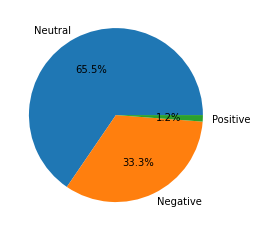

In [40]:
plt.pie(df2['PredictedSentiment'].value_counts(),labels=['Neutral','Negative','Positive'],autopct='%1.1f%%')
plt.show()

In [39]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt